# Keras(Python) ile İyi Kötü Kanser Tahmin

###### Burada Kütüphaneleri ekliyoruz

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras
from keras.layers import Input, Dense
from keras.optimizers import SGD

from sklearn.impute import SimpleImputer as Imputer
import numpy as np
import pandas as pd

Using TensorFlow backend.
C:\Users\X\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\X\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\X\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\X\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarn

###### Veri okuma işlemini pandas ile yapıyoruz 
okudugumuz verinin 1000025 inci id den başlamasını
belirledik

In [3]:
veri = pd.read_csv("breast-cancer-wisconsin.data")

veri.replace('?', -99999, inplace=True)
#veri.drop(['id'], axis=1)
veriyeni = veri.drop(['1000025'],axis=1)

###### Pandas ile okdugumuz veriyi Sklern a atayarak bize 
###### Bir ARRAY çıktı vermesini sağlıyoruz

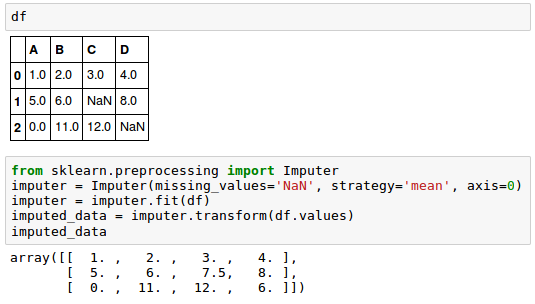


In [4]:
imp = Imputer(missing_values=np.nan, strategy="mean")
veriyeni = imp.fit_transform(veriyeni)

###### Sklearn ile aldıgımız bir Array i 
###### parçalama işlemi yapıyoruz...

In [5]:
giris = veriyeni[:,0:8]
cikis = veriyeni[:,9]

aldıgımız veriyi parçalama işlemi yapıyoruz
yaptıgımız parçalama işleminde....

### modelimizdir biz bu model üzerine eklemeler yapmaktayız her .add() dediğimiz de hidden layerlarımız eklemenmektedir ancak

In [6]:
model=Sequential()

#### bundan sonra hidden layerları nodeları bunların hepsi model üzerine inşa edilecek

### input_dim dediğmiz girişte ne kadar bilgimiz var ise onu belirtiyoruz  256 dediğimiz ise hidden layerlara bağlantı sayılarıdır... Aslında Dense bizim Nerual Networklarımızı belirliyor...

In [7]:
model.add(Dense(256,input_dim=8))

## Activiation() fonksiyonları ise bizim hesaplama fonklarımızdır bu nerual networklardan giriş çıkışları kontrol etmemizi sağlıyor (ilerleyen zamanlarda daha iyi anlayacaksınız veyahut sitesinden Activasyon fonkslarına bakın her bir fonksiyonun farklı bir hız ve özelliği ve doğruluk değeri var...)

In [8]:
model.add(Activation("relu"))

#### Her bir Activasyon fonksiyonunu ayarladıktan sonra Dense tekrar Nerual :Networklara bir Bağlantılarını yapıyoruz... 

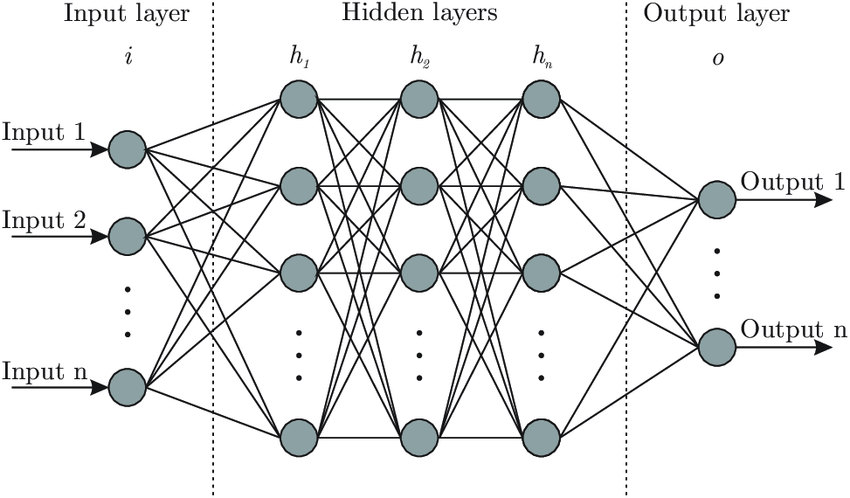

In [9]:
model.add(Dropout(0.6))

### Droupout ne demek ? 

##### Droupout bizim veri setimizde ki verileri sürekli olarak ezberlememesi için gerekli olan bir fonksiyon bu fonksiyon bize şunu sağlıyor gidip nerual network te ki layerlardan bazılarını rastgele olarak silmekte bazılarını böylelikle bize söyle bir şey sağlamakta veri setimizi ezberlemek yerine ya da ezberletmek yerine direkt olarak bu layerlardan bazılarını kaldırınca veri setimizi ezberlemekten yana gelen veriyi işlemeyi öğrenmekte diğer türlü sürekli olarak elimiz deki veriyi ezberleyince dışarıdan gelen herhangi bir veride ezberlediği data verisine göre sonuç vermekte yani aynı sorunları çöze çöze ustalaşmış hale geliyor farklı bir sorunla karşılaştıgında yanlış bir cevap verebilme ihtimalide artmakta!

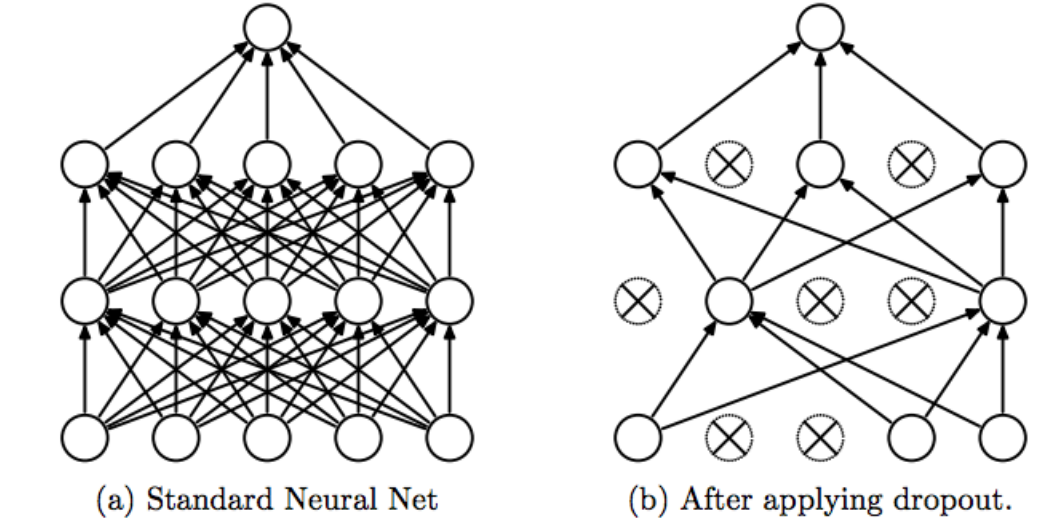


In [10]:
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.6))
model.add(Dense(256))
model.add(Activation("softmax"))

#### Her bir Activation() fonksiyonun farklı bir özelliği vardır 

bunlara https://keras.io/activations/ burada ki linkten bakabiliriz ve hakların da bilgi edinebiliriz 
en sonda genellikle Softmax kullanılmaktadır 

## Compile Optimizer Loss nedirler?

#### Compile bizim verilerimizi kontrol edilecek işlemden bir önceki işlemdir Temel oluşturuyouruz burada ve bu temele göre program çalışmaya başlayarak işlemler yapmakta...




#### Loss nedir ? Hata durumudur alınan hataya göre işlemler yapmkta 

Kayıp fonksiyonu (veya objektif fonksiyon veya optimizasyon skoru fonksiyonu) bir modeli derlemek için gereken iki parametreden biridir...

Mevcut bir kayıp işlevinin adını veya her veri noktası için bir skaler döndüren ve aşağıdaki iki bağımsız değişkeni alan bir TensorFlow / Theano sembolik işlevini iletebilirsiniz.

https://keras.io/losses/ hata fonksiyonların özelliklerine bakarak çalışmalar yapabilirsiniz...


#### Optimizer nedir ? 
Aslında direkt olarak doğruluk değeri ile alakalıdır 
seçtiğimiz bu fonksiyon bize doğruluk değerinin ne olacağını belirlemekte...

Optimize edici, bir Keras modelini derlemek için gereken iki argümandan biridir

Bir optimize ediciyi yukarıdaki örnekte olduğu gibi model.compile () öğesine iletmeden önce başlatabilir veya adıyla çağırabilirsiniz. 

https://keras.io/losses/ buradan doğruluk veya optomize fonksiyonlarına bakabilirsiniz

### Aşağıda ki gif te ise optimizerlerin hızları ve uyumları

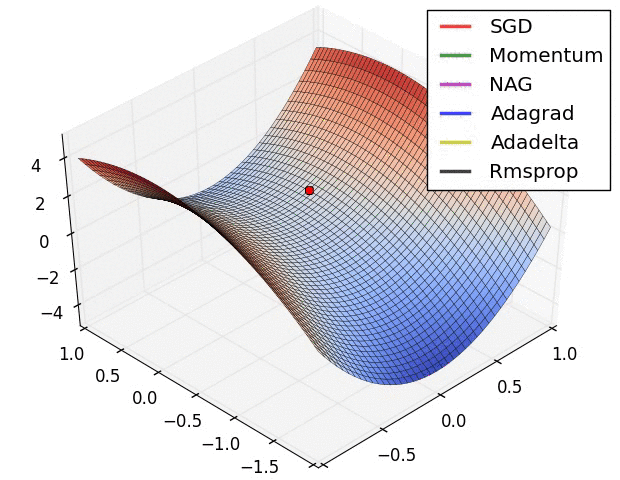


#### Bu linke bakılması gereken bir linktir burada opimizing hakkında bilgiler verilmektedir

https://ruder.io/optimizing-gradient-descent/

####  Dikkat ediniz  optimizer seçerken Learning rate işleminde learning rate ve epoch ters orantılıdır...

optimizer=keras.optimizers.sgd(lr=0.01)

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Fit nb_epoch ve validation nedir ?

#### Fit nedir ? Fit bizim yapay zekamızı ile verilerimizi oturtugumuz yerdir her şey burada başlayıp bitmektedir 

#### nb_epoch nedir ? epoch gelen veriyi kaç kez tarayacağımızı belirlemektedir 50 tur gelen array i tarama işlemi yap demekteyiz

#### validation ise gelen verilerden kaçta kaçı bizim deneyceğimiz veridir diğer veriler ise öğrenmek amaçlı olusan verilerdir diğer verilere göre öğrenir ve üstüne koyar 

In [12]:
model.fit(giris,cikis, nb_epoch=50,batch_size=32,validation_split=0.13)

C:\Users\X\Anaconda3\lib\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 607 samples, validate on 91 samples
Epoch 1/50
607/607 [==============================] - 1s - loss: 3.0057 - acc: 0.3740 - val_loss: 1.1698 - val_acc: 0.5165
Epoch 2/50
607/607 [==============================] - 0s - loss: 0.8668 - acc: 0.6705 - val_loss: 0.6889 - val_acc: 0.5495
Epoch 3/50
607/607 [==============================] - 0s - loss: 0.6794 - acc: 0.7315 - val_loss: 0.4409 - val_acc: 0.71430.729
Epoch 4/50
607/607 [==============================] - ETA: 0s - loss: 0.6034 - acc: 0.788 - 0s - loss: 0.5973 - acc: 0.7891 - val_loss: 0.3456 - val_acc: 0.9011
Epoch 5/50
607/607 [==============================] - 0s - loss: 0.5319 - acc: 0.8138 - val_loss: 0.2408 - val_acc: 0.9451
Epoch 6/50
607/607 [==============================] - 0s - loss: 0.4970 - acc: 0.8534 - val_loss: 0.2465 - val_acc: 0.9451
Epoch 7/50
607/607 [==============================] - 0s - loss: 0.4118 - acc: 0.9012 - val_loss: 0.1953 - val_acc: 0.9560
Epoch 8/50
607/607 [==============================]

##### burada bizim amacımız kendi oluşturdugumuz bir veri ile tahmin ettime işlemi yapmaktırmaktayız... Aslında veriyi kendi datasından aldım nasıl bir cevap verecek diye cevabın dört çıkması lazım yani kötü huylu...

In [20]:
tahmin = np.array([1,1,1,1,2,10,3,1]).reshape(1,8)
print("bizim verimiz {}".format(tahmin))
print(model.predict_classes(tahmin))

bizim verimiz [[ 1  1  1  1  2 10  3  1]]
1/1 [==============================] - 0s
[2]
